# Gradient Descent Visualization

We plot the heatmap of a function and mark the progress of some points as they're updated from gradient descent.

In [240]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math

In [241]:
def f(x,y):
    return ((x+2)**2 + (y-1)**2)*((x-1)**2 + (y+3)**2-2)

def gradf(x,y):
    return [((x+2)**2 + (y-1)**2)*2*(x-1) + ((x-1)**2 + (y+3)**2-2)*2*(x+2), ((x+2)**2 + (y-1)**2)*2*(y+3) + ((x-1)**2 + (y+3)**2-2)*2*(y-1)]

-53.65805955877252
11.93911139911978
10.64821395915797


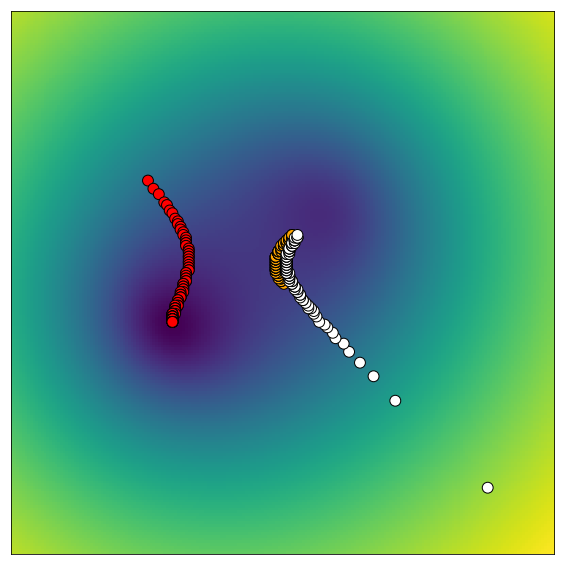

In [272]:
xmin = -8
xmax = 8
xscale = 200
dx = (xmax-xmin)/xscale

ymin = -8
ymax = 8
yscale = 200
dy = (ymax-ymin)/yscale

view = np.zeros((xscale,yscale))


for i in range(xscale):
    for j in range(yscale):
        view[i,j] = math.log(100+f(xmin+i*dx, ymin+j*dy))
        
fig, ax = plt.subplots(1, figsize=(10,10))
ax.imshow(view)

colors = ['r', 'orange', 'white']
starts =  [[-3,-4],[0,0], [6,6]]
step = 0.001


for i, start in enumerate(starts):
    for j in range(100):
        x = int((start[0]-xmin)/dx)
        y = int((start[1]-ymin)/dy)
        ax.add_patch(mpl.patches.Circle((y,x),2,edgecolor='black', facecolor=colors[i], fill = True))

        grad = gradf(start[0],start[1])
        lx = int(-step*grad[0]/dx)
        ly = int(-step*grad[1]/dy)
        #ax.add_patch(mpl.patches.Arrow(y,x,ly,lx,edgecolor='black', facecolor=colors[i]))

        start[0] -= step*grad[0]
        start[1] -= step*grad[1]

plt.xticks([])
plt.yticks([])
plt.show()